In [121]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, LeakyReLU, ELU, Activation, PReLU
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD

In [134]:
#Načítanie datasetu

#df = pd.read_excel("/content/drive/MyDrive/dataset.xlsx") #malý dataset
df = pd.read_excel("/content/drive/MyDrive/dataset_input1.xlsx") #veľký dataset

# Premiešanie riadkov v DataFrame
#df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Získanie indexov riadkov, zmiešanie indexov, tvorba nového dataframe
indexes = np.arange(len(df))
np.random.shuffle(indexes)
df_shuffled = df.iloc[indexes].reset_index(drop=True)



X = df.iloc[:, :25].values
#y = df['Rozsev 0-5'].values #malý dataset
y = df['Rozsev5mm'].values #veľký dataset


#Normalizácia dát pomocou MinMax
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#Rozdelenie dát
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [135]:
#Formátovanie vstupu
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Definovanie CNN modelu
model = Sequential([
    Conv1D(128, kernel_size=3, input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(32, kernel_size=3),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

#Trénovanie
history = model.fit(X_train, y_train, epochs=90, batch_size=128, validation_data=(X_val, y_val))

#Vyhodnotenie modelu
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


Epoch 1/90
44/44 [==============================] - 5s 52ms/step - loss: 97.4941 - val_loss: 100.8908
Epoch 2/90
44/44 [==============================] - 2s 43ms/step - loss: 70.1027 - val_loss: 88.5886
Epoch 3/90
44/44 [==============================] - 1s 26ms/step - loss: 50.2352 - val_loss: 67.4210
Epoch 4/90
44/44 [==============================] - 1s 26ms/step - loss: 33.7177 - val_loss: 46.2980
Epoch 5/90
44/44 [==============================] - 1s 25ms/step - loss: 23.0572 - val_loss: 30.5520
Epoch 6/90
44/44 [==============================] - 1s 26ms/step - loss: 17.6033 - val_loss: 21.7378
Epoch 7/90
44/44 [==============================] - 1s 25ms/step - loss: 15.1265 - val_loss: 16.0524
Epoch 8/90
44/44 [==============================] - 1s 26ms/step - loss: 14.3183 - val_loss: 13.8216
Epoch 9/90
44/44 [==============================] - 1s 25ms/step - loss: 14.1529 - val_loss: 12.9284
Epoch 10/90
44/44 [==============================] - 1s 26ms/step - loss: 13.9198 - val_lo

In [136]:
# Predikcia na testovacej sade
predicted_values = model.predict(X_test)

# Vypísanie predikovaných a skutočných hodnôt
for i in range(len(predicted_values)):
    print("Predikovaná hodnota:", predicted_values[i][0], "| Skutočná hodnota:", y_test[i])


62/62 [==============================] - 1s 6ms/step
Predikovaná hodnota: 10.391913 | Skutočná hodnota: 8.329999923706055
Predikovaná hodnota: 10.419412 | Skutočná hodnota: 9.710000038146973
Predikovaná hodnota: 9.568766 | Skutočná hodnota: 10.0
Predikovaná hodnota: 10.920724 | Skutočná hodnota: 11.26000022888184
Predikovaná hodnota: 17.725218 | Skutočná hodnota: 7.139999866485596
Predikovaná hodnota: 12.44004 | Skutočná hodnota: 12.31999969482422
Predikovaná hodnota: 10.627316 | Skutočná hodnota: 8.5
Predikovaná hodnota: 9.97704 | Skutočná hodnota: 16.46999931335449
Predikovaná hodnota: 9.727145 | Skutočná hodnota: 8.0
Predikovaná hodnota: 11.001161 | Skutočná hodnota: 14.02999973297119
Predikovaná hodnota: 14.128344 | Skutočná hodnota: 5.710000038146973
Predikovaná hodnota: 9.336873 | Skutočná hodnota: 8.979999542236328
Predikovaná hodnota: 8.993922 | Skutočná hodnota: 10.05000019073486
Predikovaná hodnota: 11.9916525 | Skutočná hodnota: 9.520000457763672
Predikovaná hodnota: 12.5219

62/62 [==============================] - 0s 4ms/step


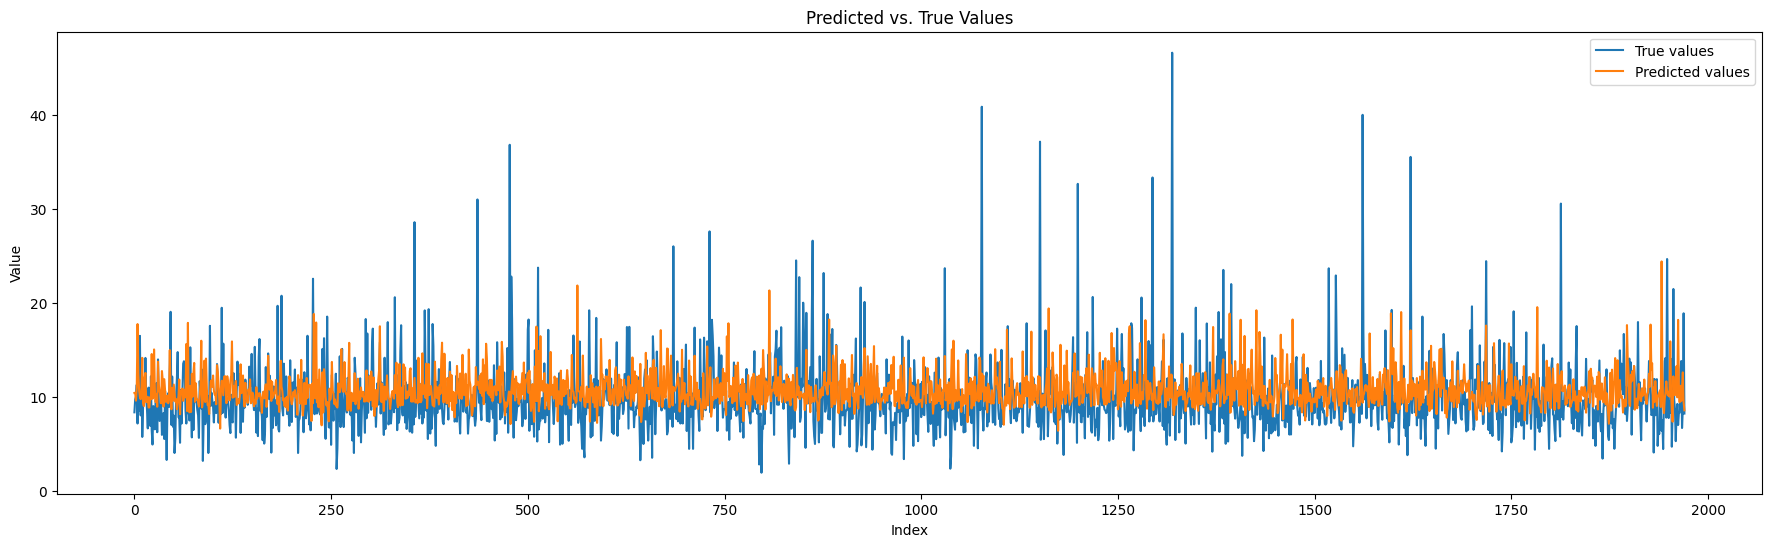

In [137]:
# Predikcia hodnôt pre testovaciu sadu
predicted_values = model.predict(X_test)

# Nastavenie šírky a výšky grafu
plt.figure(figsize=(22, 6))

# Vykreslenie grafu predikovaných a skutočných hodnôt
plt.plot(y_test, label="True values")
plt.plot(predicted_values, label="Predicted values")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Predicted vs. True Values")
plt.legend()
plt.show()


Test Loss: 17.555660247802734


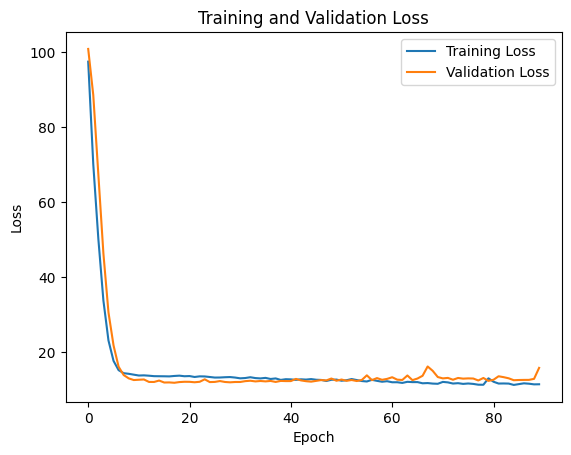

In [138]:
print("Test Loss:", loss)

#Zobrazenie v grafe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()